### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

cwd = os.getcwd()
datapath = os.path.join(cwd, 'Data', 'online_retail_II.csv')

data = pd.read_csv(datapath)
df = data.copy()
df.head()

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Section 1

### Create New Feature: Year

In [2]:
#-Ubah tipe data kolom InvoiceDate menjadi tipe ‘datetime’
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#-	Gunakan function dari library pandas untuk mendapatkan tahun dari kolom InvoiceDate
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year

### Filtering Data

In [3]:
# -	Quantity minimal 1 (tidak boleh 0 dan minus)
belowOne = df[(df['Quantity'] < 1)].index

# -	Kolom Invoice tidak mengandung huruf ‘C’ karena hal tersebut menandakan pelanggan tidak menyelesaikan belanjanya atau melakukan pembatalan.
InvC =  df[(df['Invoice'].str.contains('C'))].index
sales = df.drop(set(list(belowOne) + list(InvC)))

sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


### Create New Feature: Revenue

In [4]:
df['Revenue'] = df['Quantity'] * df['Price']
df['Revenue'].sample(5)

733661    17.70
737521     3.30
396942     1.70
60302     37.65
359608    23.40
Name: Revenue, dtype: float64

### Average of Revenue per Year

Mean over year: 
2009	: 17.684777350313965
2010	: 18.15255482730518
2011	: 18.01819460624033


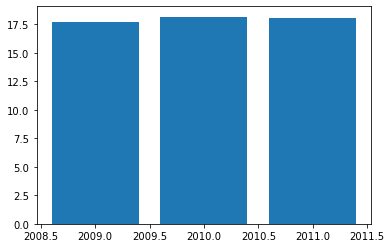

In [5]:
meanRevenuePerYear = df.groupby(['Year'])['Revenue'].mean()

print('Mean over year: ')
for i,j in zip(meanRevenuePerYear, meanRevenuePerYear.index):
    print('{}\t: {}'.format(j,i))

plt.bar(meanRevenuePerYear.index, meanRevenuePerYear)
plt.show()

([<matplotlib.patches.Wedge at 0x1b759c2c5e0>,
 [Text(0.5647735528732872, 0.9439442960126855, '2009'),
  Text(-1.0997919497175703, 0.02139316097320244, '2010'),
  Text(0.5463084163007572, -0.9547497652678206, '2011')])

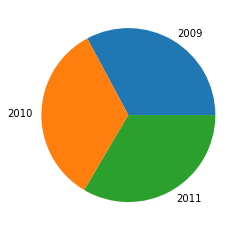

In [6]:
plt.pie(meanRevenuePerYear, labels = meanRevenuePerYear.index)

### Interpretation

Based on these information, we all knows mean value over year for 2009 to 2011 isnt spread that much (2018 : 18.71, 2010 : 19.90, 2011 : 20.05).

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [7]:
finished = sales.dropna()

#### Customers who canceled their purchases

In [8]:
cancel =  df[(df['Invoice'].str.contains('C'))]
cancel.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.4


### Number of Finished and Canceled Transactions Each Year

Year
2009     30761
2010    403094
2011    371765
Name: Year, dtype: int64 Year
2009    1015
2010    9919
2011    8560
Name: Year, dtype: int64


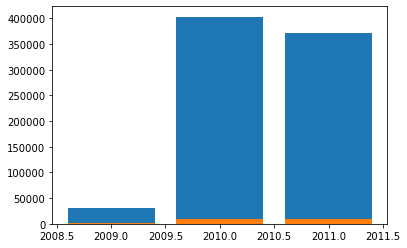

In [9]:
finishedTrans = finished.groupby(['Year'])['Year'].count()
canceledTrans = cancel.groupby(['Year'])['Year'].count()
                                 
print(finishedTrans, canceledTrans)

plt.bar(finishedTrans.index, finishedTrans)
plt.bar(canceledTrans.index, canceledTrans)

plt.show()

### Cancellation Rate

In [10]:
cancelRate = (len(cancel) / len(df)) * 100
print('{} %'.format(cancelRate))

print(len(cancel), len(df))

1.8263565339511754 %
19494 1067371


### Interpretation